# The impact of Arctic Amplification and the resulting sea ice extent reduction on the abundance of Dimethylsulfide 

## Maher Sahyoun [maher.sahyoun@envs.au.dk]

Group 4: Assisted by Antoine Haddon
31 Oct - 11 Nov 2022

## Abstract
I prpare this report as part of participaing in a project in the eScience school 2022 in Tjarno - Sweden. In this report, I invistigated the Ocean surface concentration of Dimethylsulfide (DMSOS) in the Arctic region. The investigation involved using CMIP6 data and observation for comparison purposes. The CMIP6 models predicted DMSOS concentrations differently given that are different spatial and temporal resolution  predicted the DMSOS concentrations differently  

## 1- Introduction
Dimethylsulfide (DMS) is one of the important natural gas produced by marine microbial food webs through series of biogeochemical reaction and transformations at the ocean surfaces. In details, DMS is produced through microbial decomposition of dimethylsulfoniopropionate (DMSP), which is a compound synthesized in variable amounts by different phytoplankton groups. Once DMS produced, it can either be oxidized by photochemical reaction or metabolized by bacteria. The realesed portion of DMS into the atmosphere contribute up to 70% of the natural sulfur emission into the atmosphere globaly. The oxidation process of DMS produce sulfuric and methanesulfonic acids, which eventually lead to the formation of sulfate aerosols (Andreae and Barnard, 1984; Pazmiño et al., 2005). Thereby, The oxidized products of DMS play key role in cloud formation once they are emitted into the atmosphere by contributing to the aerosol formation or their growth to larger particles sizes that can be cloud condensation nuclei (CCN), thus, altering cloud radiative forcing and precipitation.

In the Arctic regions, the warming is quicker than the rest of the globe (warming amplification). This will have influence on the sea ice extent and can potentially lead to ice-free during summer time in the coming decades. Consequently, this might enhance the emission and exchange of gases, e.g. DMS and particles from the marine surfaces into the atmpsphere. This is because ice retreat would allow more solar radiation to penetrate into the ocean surface, leading to an increase in the production of primary phytoplankton, which is essential in DMS production.

## 2- Methodology
### 2-1 CMIP6 and Observations for DMSOS 
In this study, we compare the concentration of DMS at the surface Ocean (DMSOS herein) between models and observations in the Arctic regions. For that purpose, we use two models that predicts the DMSOS concentrations, namely: a) CNRM-ESM2-1  and b) UKESM-1-0-LL for the historical period experiment and for different ensembles (5-ensembles), where the mean over the same list of member_id is calculated for both models, repectively. We compared the predicted DMSOS to the observed ones from Vali et al. (2019). The observed DMSOS concentration in Vali et al.(2019) was paramertized based on the observed chlorophyl concentraion from Modis-Aqua and SeaWifs for the periods from 2003 to 2016, and 1998 to 2007, respectively. In this report, we only consider the observed data from Modis-Aqua and compare them with modeling data for the matching period from 2003 to 2014. 

### 2-2 Avialbility of modeling and observational Data
- Modeling data
The DMSOS concentrations data extracted from the two models for the historical period of different ensembles are listed in the bucket under the directory 'escience2022/Ada/monthly'.
- Observational data
The DMSOS data extracted from observations are listed under the directory 'escience2022/Antoine/Satellite_Arctic_DMS'.

## 3- Results and Discussion
Due to Arctic amplification in recent years, the sea ice extent retreats causing consequences on the production of DMSOS from the marine ecosystems. Here, we map the DMSOS concentrations to check their distribution variability in the LPS andf GLS areas, first by models from CMIP6 and second by observations (see section 2 for the description of CMIP6 and observation used in this study).
### 3-1 DMSOS in CMIP6 during 1850 to 2014 (historical expirement period)
The prediction of DMSOS from UKESM vs CNRM over the whole historical period is analyzed.

In [1]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy 
import cartopy.crs as ccrs
import functions
import s3fs
import pandas as pd
from dask.diagnostics import ProgressBar
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import matplotlib as mpl
from scipy.interpolate import griddata
%matplotlib inline
%load_ext autoreload
%autoreload 2
# access and open the bucket
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0",
                       client_kwargs=dict(endpoint_url="https://rgw.met.no"))

In [2]:
# list the available modeling data in the bucket
dir = 'escience2022/Ada/monthly'
files = [file for file in s3.ls(dir) if 'dmsos' in file ]

In [3]:
## for UKESM
#list of member-id that we average over
list_member_id = ['1', '2', '3', '4','8','9']
list_ds = []
for imember, member in enumerate(list_member_id):
    remote_files_UK = 's3://escience2022/Ada/monthly/dmsos_Omon_UKESM1-0-LL_historical_r'+member+'*.nc'
    remote_files_UK = s3.glob(remote_files_UK)
    fileset = [s3.open(file) for file in remote_files_UK]
    list_ds.append(xr.open_mfdataset(fileset, combine='by_coords'))
## merge all the ensembles files 
ds_UKESM = xr.concat(list_ds,"member_id")
with ProgressBar():
    ds_dmsos_UKESM = ds_UKESM.dmsos.mean(dim=['member_id']).compute()
#ds_dmsos_UKESM    

[########################################] | 100% Completed | 215.41 s


In [4]:
## for CNRM
#same list of member-id as in UKESM
list_member_id2 = ['1', '2', '3', '4','8','9']
list_ds_CN = []
for imember2, member2 in enumerate(list_member_id2):
    remote_files_CN = 's3://escience2022/Ada/monthly/dmsos_Omon_CNRM-ESM2-1_historical_r'+member2+'*.nc'
    remote_files_CN = s3.glob(remote_files_CN)
    fileset2 = [s3.open(file) for file in remote_files_CN]
    list_ds_CN.append(xr.open_mfdataset(fileset2,combine="nested",compat="override"))
ds_CNRM = xr.concat(list_ds_CN,"member_id")
with ProgressBar():
    ds_dmsos_CNRM = ds_CNRM.dmsos.mean(dim=['member_id']).compute()
#ds_dmsos_CNRM


[########################################] | 100% Completed | 365.49 s


Here, we choose two contrasting areas of interest for both models to investigate whether DMS surface concentration would be different. Those areas are: a) Greenland Sea (herein GLS) and b) Laptev Sea (herein LPS).
In the following, the mean of DMSOS over the whole historical period is calculated and the resulting maps are plotted for both models over the GLS and LPS areas. 

In [5]:
##  Greenland Sea for UKESM model
dmsosset_GLarea_UKESM = ds_dmsos_UKESM.where((ds_dmsos_UKESM.longitude >= -10)
                                           & (ds_dmsos_UKESM.longitude <= 10) 
                                           & (ds_dmsos_UKESM.latitude <= 85) 
                                           & (ds_dmsos_UKESM.latitude >= 70),
                         drop=True).compute()
## test plotting one time from the data array
#ds_dmsos_UKESM.sel(time=cftime.Datetime360Day(1950, 1, 16, 
#                                                   has_year_zero=True)).plot.contourf(cmap='YlOrRd')


In [6]:
dms_MeanAllHistrorical_UKESM_GL = dmsosset_GLarea_UKESM.mean(dim='time',keep_attrs=True).compute() 
#dms_AnnMeanAllHistrorical_UKESM_GL

In [7]:
## Laptev sea for UKESM
dmsosset_LapSarea_UKESM = ds_dmsos_UKESM.where((ds_dmsos_UKESM.longitude>=100) 
                                       & (ds_dmsos_UKESM.longitude<=160) 
                                       & (ds_dmsos_UKESM.latitude <= 80)  
                                       & (ds_dmsos_UKESM.latitude >= 70),
                         drop=True).compute()
#dmsosset_LapSarea_UKESM.sel(time=cftime.Datetime360Day(1950, 1, 16, 
#                                                   has_year_zero=True)).plot.contourf(cmap='YlOrRd')

In [8]:
dms_MeanAllHistrorical_UKESM_LapS = dmsosset_LapSarea_UKESM.mean(dim='time',
                                                                    keep_attrs=True).compute() 
#dms_AnnMeanAllHistrorical_UKESM_LapS

In [9]:
# Greenland Sea for CNRM model
dmsosset_GLarea_CNRM = ds_dmsos_CNRM.where((ds_dmsos_CNRM.lon >= -10)
                                           & (ds_dmsos_CNRM.lon <= 10) 
                                           & (ds_dmsos_CNRM.lat <= 85) 
                                           & (ds_dmsos_CNRM.lat >= 70),
                         drop=True).compute()
## test plotting one time from the data array
#dmsset_GLarea_CNRM.sel(time='1850-02-16T12:00:00.000000000',
#                       method='nearest').plot.contourf(cmap='YlOrRd')

In [10]:
dms_MeanAllHistrorical_CNRM_GL = dmsosset_GLarea_CNRM.mean(dim='time',keep_attrs=True).compute() 
#dms_AnnMeanAllHistrorical_CNRM_GL

In [11]:
# Laptev Sea Sea for CNRM model
dmsosset_LapSarea_CNRM = ds_dmsos_CNRM.where((ds_dmsos_CNRM.lon >= 100)
                                           & (ds_dmsos_CNRM.lon <= 160) 
                                           & (ds_dmsos_CNRM.lat <= 80) 
                                           & (ds_dmsos_CNRM.lat >= 70),
                         drop=True).compute()
## test plotting one time from the data array
#dmsset_LapSarea_CNRM.sel(time='1850-02-16T12:00:00.000000000',method='nearest').plot.contourf(cmap='YlOrRd')

In [12]:
dms_MeanAllHistrorical_CNRM_LapS = dmsosset_LapSarea_CNRM.mean(dim='time',keep_attrs=True).compute() 
#dms_AnnMeanAllHistrorical_CNRM_LapS

/tmp/ipykernel_1985/2824333606.py:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


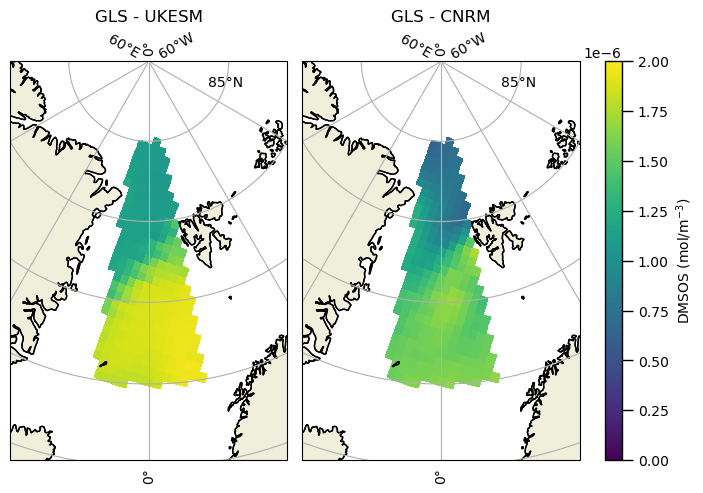

In [13]:
mpl.rcParams.update({'font.size':10})
fig, ax = plt.subplots(1,2,figsize=(6,6),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ax[0].set_extent([-20, 20,65,90], ccrs.PlateCarree())
ax[1].set_extent([-20, 20,65,90], ccrs.PlateCarree())
pl_UKESM=ax[0].pcolormesh(dms_MeanAllHistrorical_UKESM_GL.longitude,
                       dms_MeanAllHistrorical_UKESM_GL.latitude,
              dms_MeanAllHistrorical_UKESM_GL, 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[0].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[0].set_title('GLS - UKESM')
ax[0].gridlines(draw_labels=True)
ax[0].coastlines()

pl_CNRM=ax[1].pcolormesh(dms_MeanAllHistrorical_CNRM_GL.lon,
                       dms_MeanAllHistrorical_CNRM_GL.lat,
              dms_MeanAllHistrorical_CNRM_GL, 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[1].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[1].set_title('GLS - CNRM')
ax[1].gridlines(draw_labels=True)
ax[1].coastlines()
#fig.colorbar(pl_CMIP6,shrink=0.4)
############# COLORBAR properties ##############
# create the ax based on an ax dimensions
axins = inset_axes(ax[1],
                    width="6%",  
                    height="100%",
                    loc='right',
                    borderpad=-3
                   )

# add colorbar from ax
cbar = fig.colorbar(pl_UKESM, cax=axins, orientation='vertical')
cbar = fig.colorbar(pl_CNRM, cax=axins, orientation='vertical')
# style(axins)
cbar.set_label('DMSOS (mol/m$^{-3}$)', fontsize=10)

# thickness of spines around the colorbar
cbar.outline.set_linewidth(1)
fig.tight_layout()
def style_cbar(ax):
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='both', length=8, width=1, direction='out')

style_cbar(axins)
plt.savefig('Fig1_DMS_SurfConc_UKESM_vs_CNRM_Greenland_HistoricalAvrg_report.png')

###### Fig1: Comparing the Maps distribution of the mean over the whole historical period of DMSOS in the Greenland Sea area predicted by a) UKESM (left) and b) CNRM (right) models

/tmp/ipykernel_1985/2306689606.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


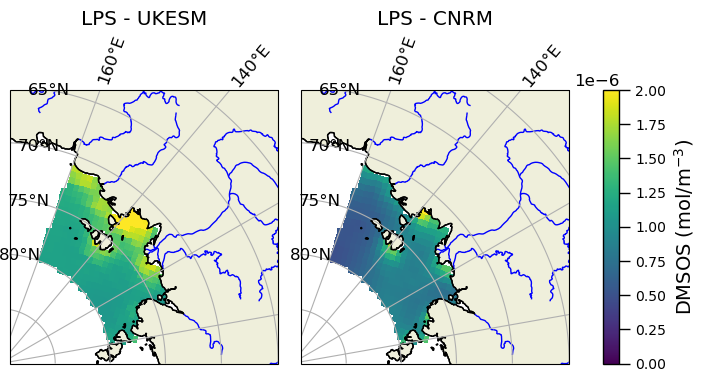

In [14]:
mpl.rcParams.update({'font.size':12})
fig, ax = plt.subplots(1,2,figsize=(6,6),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ax[0].set_extent([90,170,65,85], ccrs.PlateCarree())
ax[1].set_extent([90,170,65,85], ccrs.PlateCarree())
pl_UKESM=ax[0].pcolormesh(dms_MeanAllHistrorical_UKESM_LapS.longitude,
                       dms_MeanAllHistrorical_UKESM_LapS.latitude,
              dms_MeanAllHistrorical_UKESM_LapS, 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[0].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[0].set_title('LPS - UKESM')
ax[0].gridlines(draw_labels=True)
ax[0].coastlines()
ax[0].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')

pl_CNRM=ax[1].pcolormesh(dms_MeanAllHistrorical_CNRM_LapS.lon,
                       dms_MeanAllHistrorical_CNRM_LapS.lat,
              dms_MeanAllHistrorical_CNRM_LapS, 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[1].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[1].set_title('LPS - CNRM')
ax[1].gridlines(draw_labels=True)
ax[1].coastlines()
ax[1].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')
#fig.colorbar(pl_CMIP6,shrink=0.4)
############# COLORBAR properties ##############
# create the ax based on an ax dimensions
axins = inset_axes(ax[1],
                    width="6%",  
                    height="100%",
                    loc='right',
                    borderpad=-3
                   )

# add colorbar from ax
cbar = fig.colorbar(pl_UKESM, cax=axins, orientation='vertical')
cbar = fig.colorbar(pl_CNRM, cax=axins, orientation='vertical')
# style(axins)
cbar.set_label('DMSOS (mol/m$^{-3}$)', fontsize=14)

# thickness of spines around the colorbar
cbar.outline.set_linewidth(1)
fig.tight_layout()
def style_cbar(ax):
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='both', length=8, width=1, direction='out')

style_cbar(axins)
plt.savefig('Fig2_DMS_SurfConc_UKESM_vs_CNRM_LaptevSea_HistoricalAvrg_report.png')

###### Fig2: Comparing the Maps distribution of the mean over the whole historical period of DMSOS in the Laptev Sea area predicted by a) UKESM (left) and b) CNRM (right) models

Figures 1, 2 diplays the distribution of the mean DMSOS concentration over the historical period from 1850 to 2014 for the two arctic regions GLS and LPS, respectively. In both regions, the DMSOS predicted by UKESM was larger than CNRM; being factor of ~ 2 to 3. This difference can be due to the different parametrizations that are used to estimate the DMSOS concentrations as well as to the different spatial resolution in both models. 

### 3-2 DMSOS predicted by CMIP6 vs Observations during matching period 2003 to 2014 

To compare with observations, we work with the observational data only for the matching period that extend from 2003 to 2014.

In [15]:
#list the available observational data in the bucket
s3files = 's3://escience2022/Antoine/Satellite_Arctic_DMS/dms_gsm_A*_8D_28km.nc'
remote_files = s3.glob(s3files)
fileset = [s3.open(file) for file in remote_files]
ds_obs = xr.open_mfdataset(fileset, combine='by_coords')

Note1: The observational data of DMSOS are incremented differently to the modeling data, where periods of 8 days are considered instead of normal daily or montly periods in models. Therefore, we used the following method to add date and transform the periods of 8 days into month.

In [16]:
## add date to the observational data
import datetime
dates = np.array([
    [datetime.datetime(int(y.values), 1, 1) + datetime.timedelta(d.values - 1) for d in ds_obs.startjulday.sel(year=y)] 
        for y in ds_obs.year])

ds_obs=ds_obs.assign_coords({ "d": (['year','period'],dates ) })
ds_obs=ds_obs.stack(time=['year','period'])
ds_obs=ds_obs.set_index(time='d')
ds_obs

<xarray.Dataset>
Dimensions:      (pixel: 96668, time: 644)
Coordinates:
  * time         (time) datetime64[ns] 2003-01-01 2003-01-09 ... 2016-12-26
    year         (time) float64 2.003e+03 2.003e+03 ... 2.016e+03 2.016e+03
    period       (time) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
Dimensions without coordinates: pixel
Data variables:
    longitude    (pixel, time) float64 dask.array<chunksize=(96668, 46), meta=np.ndarray>
    latitude     (pixel, time) float64 dask.array<chunksize=(96668, 46), meta=np.ndarray>
    startjulday  (time) float64 dask.array<chunksize=(46,), meta=np.ndarray>
    endjulday    (time) float64 dask.array<chunksize=(46,), meta=np.ndarray>
    dms          (pixel, time) float64 dask.array<chunksize=(96668, 46), meta=np.ndarray>

In [17]:
## Greenland Sea for Observations
DmsObs_GLSarea = ds_obs.where((ds_obs.longitude>=-10) & (ds_obs.longitude<=10) 
                           & (ds_obs.latitude <= 85)  & (ds_obs.latitude >= 70),
                         drop=True).compute()
DmsObs_GLSarea

<xarray.Dataset>
Dimensions:      (pixel: 1033, time: 644)
Coordinates:
  * time         (time) datetime64[ns] 2003-01-01 2003-01-09 ... 2016-12-26
    year         (time) float64 2.003e+03 2.003e+03 ... 2.016e+03 2.016e+03
    period       (time) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
Dimensions without coordinates: pixel
Data variables:
    longitude    (pixel, time) float64 -9.918 -9.918 -9.918 ... 8.372 8.372
    latitude     (pixel, time) float64 70.12 70.12 70.12 ... 84.88 84.88 84.88
    startjulday  (time, pixel) float64 1.0 1.0 1.0 1.0 ... 361.0 361.0 361.0
    endjulday    (time, pixel) float64 8.0 8.0 8.0 8.0 ... 365.0 365.0 365.0
    dms          (pixel, time) float64 nan nan nan nan nan ... nan nan nan nan

In [18]:
## we select the period from 2003 to 2014 and ignore the the last two years
dmsObs_2003to2014_GLS = DmsObs_GLSarea.isel(time= slice(552))
dmsObs_2003to2014_GLS

<xarray.Dataset>
Dimensions:      (pixel: 1033, time: 552)
Coordinates:
  * time         (time) datetime64[ns] 2003-01-01 2003-01-09 ... 2014-12-27
    year         (time) float64 2.003e+03 2.003e+03 ... 2.014e+03 2.014e+03
    period       (time) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
Dimensions without coordinates: pixel
Data variables:
    longitude    (pixel, time) float64 -9.918 -9.918 -9.918 ... 8.372 8.372
    latitude     (pixel, time) float64 70.12 70.12 70.12 ... 84.88 84.88 84.88
    startjulday  (time, pixel) float64 1.0 1.0 1.0 1.0 ... 361.0 361.0 361.0
    endjulday    (time, pixel) float64 8.0 8.0 8.0 8.0 ... 365.0 365.0 365.0
    dms          (pixel, time) float64 nan nan nan nan nan ... nan nan nan nan

In [19]:
# calculate the mean over 2003 to 2014
dmsObs_Mean_2003to2014_GLS = dmsObs_2003to2014_GLS.mean(dim='time').compute() 
dmsObs_Mean_2003to2014_GLS

<xarray.Dataset>
Dimensions:      (pixel: 1033)
Dimensions without coordinates: pixel
Data variables:
    longitude    (pixel) float64 -9.918 -9.184 -8.449 ... 2.791 5.581 8.372
    latitude     (pixel) float64 70.12 70.12 70.12 70.12 ... 84.88 84.88 84.88
    startjulday  (pixel) float64 181.0 181.0 181.0 181.0 ... 181.0 181.0 181.0
    endjulday    (pixel) float64 187.9 187.9 187.9 187.9 ... 187.9 187.9 187.9
    dms          (pixel) float64 1.927 2.022 2.042 1.936 ... nan nan nan nan

In [20]:
## Laptev Sea
DmsObs_LapSarea = ds_obs.where((ds_obs.longitude>=100) & (ds_obs.longitude<=160) 
                           & (ds_obs.latitude <= 80)  & (ds_obs.latitude >= 70),
                         drop=True).compute()
DmsObs_LapSarea

<xarray.Dataset>
Dimensions:      (pixel: 2485, time: 644)
Coordinates:
  * time         (time) datetime64[ns] 2003-01-01 2003-01-09 ... 2016-12-26
    year         (time) float64 2.003e+03 2.003e+03 ... 2.016e+03 2.016e+03
    period       (time) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
Dimensions without coordinates: pixel
Data variables:
    longitude    (pixel, time) float64 100.3 100.3 100.3 ... 159.4 159.4 159.4
    latitude     (pixel, time) float64 70.12 70.12 70.12 ... 79.88 79.88 79.88
    startjulday  (time, pixel) float64 1.0 1.0 1.0 1.0 ... 361.0 361.0 361.0
    endjulday    (time, pixel) float64 8.0 8.0 8.0 8.0 ... 365.0 365.0 365.0
    dms          (pixel, time) float64 nan nan nan nan nan ... nan nan nan nan

In [21]:
## we select the period from 2003 to 2014 and ignore the the last two years
dmsObs_2003to2014_LapS = DmsObs_LapSarea.isel(time= slice(552))
dmsObs_2003to2014_LapS

<xarray.Dataset>
Dimensions:      (pixel: 2485, time: 552)
Coordinates:
  * time         (time) datetime64[ns] 2003-01-01 2003-01-09 ... 2014-12-27
    year         (time) float64 2.003e+03 2.003e+03 ... 2.014e+03 2.014e+03
    period       (time) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
Dimensions without coordinates: pixel
Data variables:
    longitude    (pixel, time) float64 100.3 100.3 100.3 ... 159.4 159.4 159.4
    latitude     (pixel, time) float64 70.12 70.12 70.12 ... 79.88 79.88 79.88
    startjulday  (time, pixel) float64 1.0 1.0 1.0 1.0 ... 361.0 361.0 361.0
    endjulday    (time, pixel) float64 8.0 8.0 8.0 8.0 ... 365.0 365.0 365.0
    dms          (pixel, time) float64 nan nan nan nan nan ... nan nan nan nan

In [22]:
dmsObs_Mean_2003to2014_LapS = dmsObs_2003to2014_LapS.mean(dim='time').compute() 
#.compute does the excution of the mean operation
dmsObs_Mean_2003to2014_LapS



<xarray.Dataset>
Dimensions:      (pixel: 2485)
Dimensions without coordinates: pixel
Data variables:
    longitude    (pixel) float64 100.3 101.0 101.8 102.5 ... 156.5 157.9 159.4
    latitude     (pixel) float64 70.12 70.12 70.12 70.12 ... 79.88 79.88 79.88
    startjulday  (pixel) float64 181.0 181.0 181.0 181.0 ... 181.0 181.0 181.0
    endjulday    (pixel) float64 187.9 187.9 187.9 187.9 ... 187.9 187.9 187.9
    dms          (pixel) float64 nan nan nan nan nan ... 1.337 2.245 1.852 1.764

Note2: The coordinates system of these observations are indexed with pixels instead of (x,y) or (i,j) system. Therefore, we use the following function 'interGali' from the Functions.py to transform the coordinate system and make the DMSOS from observations comparable with CMIP6 modeling data.  

In [23]:
from scipy.interpolate import griddata
def interGali(ds,var):
    '''
        Interploting data on a regular lat,lon grid
        grid is built from latitudes and the longitudes on the lowest latitude
        Input : 
            ds : xarray dataset with latitude, longitude and variable "var" to be interpolated. 
                var, lat,long must be 1d (ie. not depend on time)
            var : string name of variable
        Returns a xarray dataArray with the gridded variable and lat lon as coords
    '''    
    # sorting according to latitudes
    lalo = pd.MultiIndex.from_arrays([ds.latitude.values, ds.longitude.values]).sortlevel(level=0)[0] 
    # get longitudes of lowest latitude
    lowlat = lalo.values[0][0]
    lon1d = np.array([x[1] for x in lalo.values if x[0]==lowlat])
    # get latitudes
    lat1d = np.unique(ds.latitude.values)
    # Building regular grid of lat and lon
    lon, lat = np.meshgrid(lon1d,lat1d)

    # interpolation
    var_gridded =griddata(
            (ds.longitude.values, ds.latitude.values), #points
            ds[var].values, #data
            (lon, lat), #grid on which to interpolate
            method='nearest')
    
    return  xr.DataArray(
        var_gridded,
        dims=("lat","lon"),
        coords={
            "lat": lat1d,
            "lon": lon1d
        }
    )

In [24]:
dmsObs_Mean_2003to2014_GLS = interGali(dmsObs_Mean_2003to2014_GLS, 'dms')

In [25]:
dmsObs_Mean_2003to2014_LapS = interGali(dmsObs_Mean_2003to2014_LapS, 'dms')
dmsObs_Mean_2003to2014_LapS

<xarray.DataArray (lat: 40, lon: 82)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
        7.89935662],
       ...,
       [1.43696065, 1.4629335 , 1.34438606, ..., 1.79688805, 1.77197742,
        1.57463421],
       [1.43696065, 1.14528239, 1.34438606, ..., 1.79688805, 1.77197742,
        1.57463421],
       [1.43696065, 1.14528239, 1.34438606, ..., 1.79688805, 1.7643332 ,
        1.57463421]])
Coordinates:
  * lat      (lat) float64 70.12 70.38 70.62 70.88 ... 79.12 79.38 79.62 79.88
  * lon      (lon) float64 100.3 101.0 101.8 102.5 ... 157.6 158.3 159.1 159.8

In [26]:
dms_Mean2003to2014_GLS_UKESM = dmsosset_GLarea_UKESM.isel(time = slice(1836,None)).mean(dim='time',
                                                        keep_attrs=True).compute()

In [27]:
dms_Mean2003to2014_GLS_CNRM = dmsosset_GLarea_CNRM.isel(time = slice(1836,
                                                        None)).mean(dim='time',
                                                        keep_attrs=True).compute()


In [28]:
dms_Mean2003to2014_LapS_UKESM = dmsosset_LapSarea_UKESM.isel(time = slice(1836,None)).mean(dim='time',
                                                        keep_attrs=True).compute()

In [29]:
dms_Mean2003to2014_LapS_CNRM = dmsosset_LapSarea_CNRM.isel(time = slice(1836,None)).mean(dim='time',
                                                        keep_attrs=True).compute()

/tmp/ipykernel_1985/3258323008.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


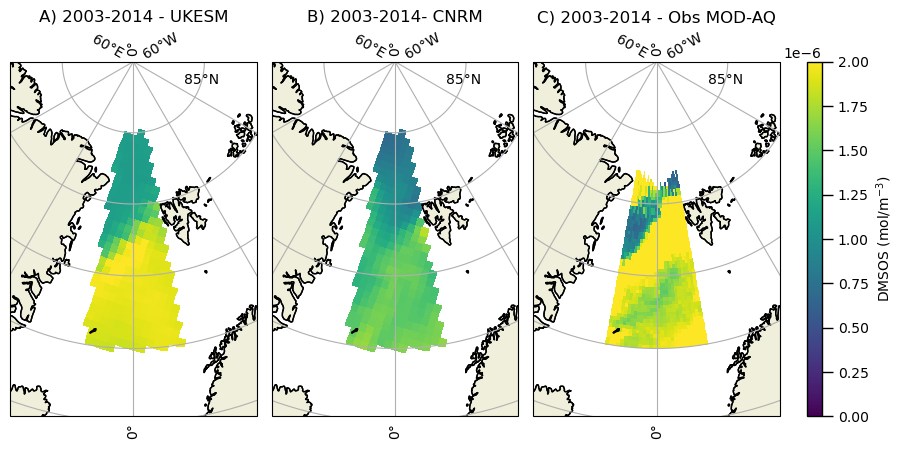

In [30]:
mpl.rcParams.update({'font.size':10})
fig, ax = plt.subplots(1,3,figsize=(8,8),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ax[0].set_extent([-20, 20,65,90], ccrs.PlateCarree())
ax[1].set_extent([-20, 20,65,90], ccrs.PlateCarree())
ax[2].set_extent([-20, 20,65,90], ccrs.PlateCarree())
pl_UKESM=ax[0].pcolormesh(dms_Mean2003to2014_GLS_UKESM.longitude,
                       dms_Mean2003to2014_GLS_UKESM.latitude,
              dms_Mean2003to2014_GLS_UKESM, 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[0].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[0].set_title('A) 2003-2014 - UKESM')
ax[0].gridlines(draw_labels=True)
ax[0].coastlines()
ax[0].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')
pl_CNRM=ax[1].pcolormesh(dms_Mean2003to2014_GLS_CNRM.lon,
                         dms_Mean2003to2014_GLS_CNRM.lat,
                         dms_Mean2003to2014_GLS_CNRM, 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[1].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[1].set_title('B) 2003-2014- CNRM')
ax[1].gridlines(draw_labels=True)
ax[1].coastlines()
ax[1].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')

pl_Obs=ax[2].pcolormesh(dmsObs_Mean_2003to2014_GLS.lon,
                        dmsObs_Mean_2003to2014_GLS.lat,
                        dmsObs_Mean_2003to2014_GLS*1.0e-6,
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[2].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[2].set_title('C) 2003-2014 - Obs MOD-AQ')
ax[2].gridlines(draw_labels=True)
ax[2].coastlines()
ax[2].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')
#fig.colorbar(pl_CMIP6,shrink=0.4)
############# COLORBAR properties ##############
# create the ax based on an ax dimensions
axins = inset_axes(ax[2],
                    width="6%",  
                    height="100%",
                    loc='right',
                    borderpad=-3
                   )

# add colorbar from ax
cbar = fig.colorbar(pl_UKESM, cax=axins, orientation='vertical')
cbar = fig.colorbar(pl_CNRM, cax=axins, orientation='vertical')
cbar = fig.colorbar(pl_Obs, cax=axins, orientation='vertical')
# style(axins)
cbar.set_label('DMSOS (mol/m$^{-3}$)')

# thickness of spines around the colorbar
cbar.outline.set_linewidth(1)
fig.tight_layout()
def style_cbar(ax):
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='both', length=8, width=1, direction='out')

style_cbar(axins)
plt.savefig('Fig3_DMS_SurfConc_UKESM_vs_CNRM_vs_Obs_GreenlandSea_2003to2014Avrg.png')

/tmp/ipykernel_1985/1643800862.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


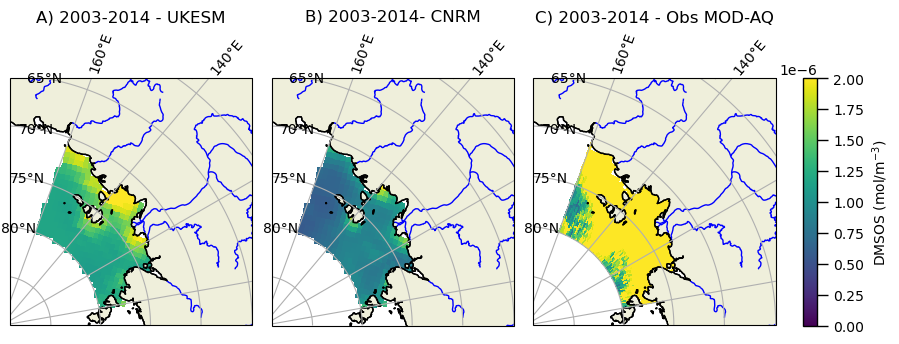

In [31]:
mpl.rcParams.update({'font.size':10})
fig, ax = plt.subplots(1,3,figsize=(8,8),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ax[0].set_extent([90,170,65,85], ccrs.PlateCarree())
ax[1].set_extent([90,170,65,85], ccrs.PlateCarree())
ax[2].set_extent([90,170,65,85], ccrs.PlateCarree())
pl_UKESM=ax[0].pcolormesh(dms_Mean2003to2014_LapS_UKESM.longitude,
                       dms_Mean2003to2014_LapS_UKESM.latitude,
              dms_Mean2003to2014_LapS_UKESM, 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[0].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[0].set_title('A) 2003-2014 - UKESM')
ax[0].gridlines(draw_labels=True)
ax[0].coastlines()
ax[0].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')
pl_CNRM=ax[1].pcolormesh(dms_Mean2003to2014_LapS_CNRM.lon,
                         dms_Mean2003to2014_LapS_CNRM.lat,
                         dms_Mean2003to2014_LapS_CNRM, 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[1].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[1].set_title('B) 2003-2014- CNRM')
ax[1].gridlines(draw_labels=True)
ax[1].coastlines()
ax[1].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')

pl_Obs=ax[2].pcolormesh(dmsObs_Mean_2003to2014_LapS.lon,
                        dmsObs_Mean_2003to2014_LapS.lat,
                        dmsObs_Mean_2003to2014_LapS*1.0e-6,
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[2].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[2].set_title('C) 2003-2014 - Obs MOD-AQ')
ax[2].gridlines(draw_labels=True)
ax[2].coastlines()
ax[2].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')
#fig.colorbar(pl_CMIP6,shrink=0.4)
############# COLORBAR properties ##############
# create the ax based on an ax dimensions
axins = inset_axes(ax[2],
                    width="6%",  
                    height="100%",
                    loc='right',
                    borderpad=-3
                   )

# add colorbar from ax
cbar = fig.colorbar(pl_UKESM, cax=axins, orientation='vertical')
cbar = fig.colorbar(pl_CNRM, cax=axins, orientation='vertical')
cbar = fig.colorbar(pl_Obs, cax=axins, orientation='vertical')
# style(axins)
cbar.set_label('DMSOS (mol/m$^{-3}$)')

# thickness of spines around the colorbar
cbar.outline.set_linewidth(1)
fig.tight_layout()
def style_cbar(ax):
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='both', length=8, width=1, direction='out')

style_cbar(axins)
plt.savefig('Fig4_DMS_SurfConc_UKESM_vs_CNRM_vs_Obs_LaptevSea_2003to2014Avrg.png')

###### Fig4:Comparing the Maps distribution of the mean over the matching period (2003-2014) of DMSOS in the Laptev Sea area predicted by A) UKESM and B) CNRM models, and C) observations from Modis-Aqua (Gali et al. (2019)) 

During the matching period between 2003 and 2004 and over the GLS and LPS areas, UKESM still predicts larger DMSOS mean concentration than CNRM (factor of ~ 2) as illustarted in Figures 3 and 4. However, both models predicts less DMSOS mean concentrations than what has been observed (factor of ~ 4 in many spots) for both GLS and LPS areas and in general over the whole Arctic. In addition,  the observed DMSOS mean over the LPS domain during the matching period is higher than what is observed in the GLS domain. This might be explained by the more decrease of sea ice content (sea ice melting) during the recent years due to climate change in the Arctic region, which has more influence on the LPS domain than GLS, which is more represented by open Ocean. The observed DMSOS mean over the LPS domain is 4.8 umol/m-3 in comparison to 1.0 and 1.82 umol/m-3 for CNRM and UKESM, respectively. In contrary, the DMSOS mean over the GLS domain during the same matching period is comparable between both models and observations; being 2.4, 1.94, 1.7 umol/m-3 for observation, UKESM, and CNRM, respectively.  Once again, this difference between observation and models can be explained by the higher spatial and temporal resolution that observations possess; being 28 km.

### 3-3 DMSOS climatic & seasonality trends; CMIP6 vs Observations
#### 3-3-1 DMSOS climatic trend
Here,the long range (climatic) trend is caluclated and plotted in Fig5, where the annula mean of DMSOS is compared between the two used models CNRM and UKESM for the historical period for both LPS (Fig5a) and GLS (Fig5b) areas. At the end of the that period, i.e. 2003 to 2014, the DMSOS observations.    

In [32]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat = col.search(source_id=['CNRM-ESM2-1'], activity_id = ['CMIP']
                 , experiment_id=['historical'], table_id=['Ofx']
                 , variable_id=['areacello']
                 , member_id=['r1i1p1f2']
                )
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206


In [33]:
glbArea_dict_CNRM = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [34]:
areacello_CNRM = glbArea_dict_CNRM[list(glbArea_dict_CNRM.keys())[0]]
areacello_CNRM = areacello_CNRM.squeeze()

In [35]:
LapSarea = areacello_CNRM.areacello.where((areacello_CNRM.lat>=70) 
                                   & (areacello_CNRM.lat<=80) 
                                   & (areacello_CNRM.lon <= 160)  
                                   & (areacello_CNRM.lon >= 100),
                                  drop=True)
GLSarea = areacello_CNRM.areacello.where((areacello_CNRM.lat>=70) 
                                   & (areacello_CNRM.lat<=85) 
                                   & (areacello_CNRM.lon <= 10)  
                                   & (areacello_CNRM.lon >= -10),
                                  drop=True)

In [36]:
## averaging over the whole area of Laptev-Sea
dmsosset_AreaMean_CNRM_LapS = (LapSarea*dmsosset_LapSarea_CNRM
                               ).sum(dim=('x','y'))/LapSarea.sum(dim=('x','y')
                              ,keep_attrs=True)
## averaging over GLS
dmsosset_AreaMean_CNRM_GLS = (GLSarea*dmsosset_GLarea_CNRM
                               ).sum(dim=('x','y'))/GLSarea.sum(dim=('x','y')
                              ,keep_attrs=True)

In [37]:
dmsosset_AreaMean_AnnMean_CNRM_LapS = dmsosset_AreaMean_CNRM_LapS.groupby(
                                       'time.year').mean(dim='time').compute()
dmsosset_AreaMean_AnnSTD_CNRM_LapS = dmsosset_AreaMean_CNRM_LapS.groupby(
                                      'time.year').std(dim='time').compute()

dmsosset_AreaMean_AnnMean_CNRM_GLS = dmsosset_AreaMean_CNRM_GLS.groupby(
                                       'time.year').mean(dim='time').compute()
dmsosset_AreaMean_AnnSTD_CNRM_GLS = dmsosset_AreaMean_CNRM_GLS.groupby(
                                      'time.year').std(dim='time').compute()

In [38]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
cat_UK = col.search(source_id=['UKESM1-0-LL'], activity_id = ['CMIP']
                 , variable_id=['areacello']
                )
cat_UK.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,MOHC,UKESM1-0-LL,piControl,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/piContr...,NaN,20190705


In [39]:
glbArea_dict_UK = cat_UK.to_dataset_dict(zarr_kwargs={'use_cftime':True})
areacello_UK = glbArea_dict_UK[list(glbArea_dict_UK.keys())[0]]
areacello_UK = areacello_UK.squeeze()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [40]:
LapSarea_UK = areacello_UK.areacello.where((areacello_UK.latitude>=70) 
                                   & (areacello_UK.latitude<=80) 
                                   & (areacello_UK.longitude <= 160)  
                                   & (areacello_UK.longitude >= 100),
                                  drop=True)
GLSarea_UK = areacello_UK.areacello.where((areacello_UK.latitude>=70) 
                                   & (areacello_UK.latitude<=80) 
                                   & (areacello_UK.longitude <= 10)  
                                   & (areacello_UK.longitude >= -10),
                                  drop=True)

In [41]:
## averaging over the whole area of Laptev-Sea
dmsosset_AreaMean_UKESM_LapS = (LapSarea_UK*dmsosset_LapSarea_UKESM
                               ).sum(dim=('i','j'))/LapSarea_UK.sum(dim=('i','j')
                              ,keep_attrs=True)
## averaging over GLS area
dmsosset_AreaMean_UKESM_GLS = (GLSarea_UK*dmsosset_GLarea_UKESM
                               ).sum(dim=('i','j'))/GLSarea_UK.sum(dim=('i','j')
                              ,keep_attrs=True)

In [42]:
dmsosset_AreaMean_AnnMean_UKESM_LapS = dmsosset_AreaMean_UKESM_LapS.groupby(
                                       'time.year').mean(dim='time').compute()
dmsosset_AreaMean_AnnSTD_UKESM_LapS = dmsosset_AreaMean_UKESM_LapS.groupby(
                                      'time.year').std(dim='time').compute()

dmsosset_AreaMean_AnnMean_UKESM_GLS = dmsosset_AreaMean_UKESM_GLS.groupby(
                                       'time.year').mean(dim='time').compute()
dmsosset_AreaMean_AnnSTD_UKESM_GLS = dmsosset_AreaMean_UKESM_GLS.groupby(
                                      'time.year').std(dim='time').compute()

The DMSOS observations are provided with the pixel system of 28 km resolution instead of (x,y) or (i,j) system in CMIP6. Therefore, the spatial mean is calculated directly based on the pixel without the need of wieghting the averages with areacello (the area of each grid cell in the model). 

In [80]:
dmsosObs_AreaMean_2003to2014_LapS = dmsObs_2003to2014_LapS.mean(dim='pixel',
                                                     keep_attrs=True).compute()
dmsosObs_AreaMean_2003to2014_GLS = dmsObs_2003to2014_GLS.mean(dim='pixel',
                                                     keep_attrs=True).compute()
dmsosObs_AreaMean_2003to2014_GLS


<xarray.Dataset>
Dimensions:      (time: 552)
Coordinates:
  * time         (time) datetime64[ns] 2003-01-01 2003-01-09 ... 2014-12-27
    year         (time) float64 2.003e+03 2.003e+03 ... 2.014e+03 2.014e+03
    period       (time) int64 0 1 2 3 4 5 6 7 8 9 ... 37 38 39 40 41 42 43 44 45
Data variables:
    longitude    (time) float64 3.439e-18 3.439e-18 ... 3.439e-18 3.439e-18
    latitude     (time) float64 76.02 76.02 76.02 76.02 ... 76.02 76.02 76.02
    startjulday  (time) float64 1.0 9.0 17.0 25.0 ... 337.0 345.0 353.0 361.0
    endjulday    (time) float64 8.0 16.0 24.0 32.0 ... 344.0 352.0 360.0 365.0
    dms          (time) float64 nan nan nan nan nan nan ... nan nan nan nan nan

In [205]:
dmsosObs_AreaMean_AnnMean_2003to2014_LapS = dmsosObs_AreaMean_2003to2014_LapS.groupby(
                                            'time.year').mean().compute()
dmsosObs_AreaMean_AnnSTD_2003to2014_LapS = dmsosObs_AreaMean_2003to2014_LapS.groupby(
                                            'time.year').std().compute()
dmsosObs_AreaMean_AnnMean_2003to2014_GLS = dmsosObs_AreaMean_2003to2014_GLS.groupby(
                                            'time.year').mean().compute()
dmsosObs_AreaMean_AnnSTD_2003to2014_GLS = dmsosObs_AreaMean_2003to2014_GLS.groupby(
                                            'time.year').std().compute()

In [206]:
## function to calculate the trend
from scipy import stats
def linreg(x,y):
    dict_ = {'x':x.values,'y':y.values}
    df_ = pd.DataFrame.from_dict(dict_)
    df_ = df_.dropna()
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_['x'],df_['y'])
    fitted_model = slope*df_['x'] + intercept
    return (df_['x'],df_['y'],fitted_model,slope,intercept)

/tmp/ipykernel_1985/3291977977.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(model_CNRM_LPS_fit1[0],model_CNRM_LPS_fit1[2], '--k', color='red')
/tmp/ipykernel_1985/3291977977.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(model_UKESM_LPS_fit2[0],model_UKESM_LPS_fit2[2], '--k', color='blue')
/tmp/ipykernel_1985/3291977977.py:50: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax[1].plot(model_CNRM_GLS_fit1[0],model_CNRM_GLS_fit1[2], '--k', color='red')
/tmp/ipykernel_1985/3291977977.py:58: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argu

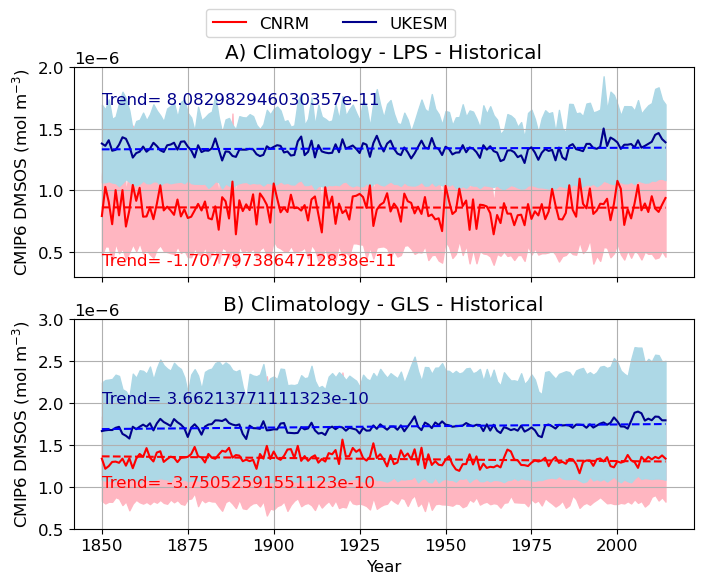

In [207]:
mpl.rcParams.update({'font.size':12})

model_CNRM_LPS_fit1 = linreg(dmsosset_AreaMean_AnnMean_CNRM_LapS.year,
                            dmsosset_AreaMean_AnnMean_CNRM_LapS)
slope1 = model_CNRM_LPS_fit1[3]
model_UKESM_LPS_fit2 = linreg(dmsosset_AreaMean_AnnMean_UKESM_LapS.year,
                            dmsosset_AreaMean_AnnMean_UKESM_LapS)
slope2 = model_UKESM_LPS_fit2[3]
model_CNRM_GLS_fit1 = linreg(dmsosset_AreaMean_AnnMean_CNRM_GLS.year,
                            dmsosset_AreaMean_AnnMean_CNRM_GLS)
slope3 = model_CNRM_GLS_fit1[3]
model_UKESM_GLS_fit2 = linreg(dmsosset_AreaMean_AnnMean_UKESM_GLS.year,
                            dmsosset_AreaMean_AnnMean_UKESM_GLS)
slope4 = model_UKESM_GLS_fit2[3]
fig, ax = plt.subplots(2,1,figsize=(8,6))
ax[0].plot(dmsosset_AreaMean_AnnMean_CNRM_LapS.year,
         dmsosset_AreaMean_AnnMean_CNRM_LapS,label='CNRM',color='red')
ax[0].fill_between(dmsosset_AreaMean_AnnMean_CNRM_LapS.year,dmsosset_AreaMean_AnnMean_CNRM_LapS
                 -0.5*dmsosset_AreaMean_AnnSTD_CNRM_LapS,dmsosset_AreaMean_AnnMean_CNRM_LapS
                 +0.5*dmsosset_AreaMean_AnnSTD_CNRM_LapS,color='lightpink')
ax[0].plot(model_CNRM_LPS_fit1[0],model_CNRM_LPS_fit1[2], '--k', color='red')
ax[0].text(1850,0.4e-6,'Trend= {0}'.format(slope1),color='red')

ax[0].plot(dmsosset_AreaMean_AnnMean_UKESM_LapS.year,
         dmsosset_AreaMean_AnnMean_UKESM_LapS,label='UKESM',color='darkblue')
ax[0].fill_between(dmsosset_AreaMean_AnnMean_UKESM_LapS.year,dmsosset_AreaMean_AnnMean_UKESM_LapS
                 -0.5*dmsosset_AreaMean_AnnSTD_UKESM_LapS,dmsosset_AreaMean_AnnMean_UKESM_LapS
                 +0.5*dmsosset_AreaMean_AnnSTD_UKESM_LapS,color='lightblue')
ax[0].plot(model_UKESM_LPS_fit2[0],model_UKESM_LPS_fit2[2], '--k', color='blue')
ax[0].text(1850,1.7e-6,'Trend= {0}'.format(slope2),color='darkblue')
ax[0].set_xticklabels([])
            

#ax0 = ax[0].twinx()
#ax0.plot(dmsosObs_AreaMean_AnnMean_2003to2014_LapS.year,
#         dmsosObs_AreaMean_AnnMean_2003to2014_LapS['dms']*1.0e-6,label='Obs',
#         color='green')
#ax0.fill_between(dmsosObs_AreaMean_AnnMean_2003to2014_LapS.year,
#                 (dmsosObs_AreaMean_AnnMean_2003to2014_LapS['dms']*1.0e-6)-0.5*
#                 (dmsosObs_AreaMean_AnnSTD_2003to2014_LapS['dms']*1.0e-6),
#                 (dmsosObs_AreaMean_AnnMean_2003to2014_LapS['dms']*1.0e-6)+0.5*
#                 (dmsosObs_AreaMean_AnnSTD_2003to2014_LapS['dms']*1.0e-6),
#                 color='lightgreen')

ax[1].plot(dmsosset_AreaMean_AnnMean_CNRM_GLS.year,
         dmsosset_AreaMean_AnnMean_CNRM_GLS,label='CNRM',color='red')
ax[1].fill_between(dmsosset_AreaMean_AnnMean_CNRM_GLS.year,dmsosset_AreaMean_AnnMean_CNRM_GLS
                 -0.5*dmsosset_AreaMean_AnnSTD_CNRM_GLS,dmsosset_AreaMean_AnnMean_CNRM_GLS
                 +0.5*dmsosset_AreaMean_AnnSTD_CNRM_GLS,color='lightpink')
ax[1].plot(model_CNRM_GLS_fit1[0],model_CNRM_GLS_fit1[2], '--k', color='red')
ax[1].text(1850,1.0e-6,'Trend= {0}'.format(slope3),color='red')

ax[1].plot(dmsosset_AreaMean_AnnMean_UKESM_GLS.year,
         dmsosset_AreaMean_AnnMean_UKESM_GLS,label='UKESM',color='darkblue')
ax[1].fill_between(dmsosset_AreaMean_AnnMean_UKESM_GLS.year,dmsosset_AreaMean_AnnMean_UKESM_GLS
                 -0.5*dmsosset_AreaMean_AnnSTD_UKESM_GLS,dmsosset_AreaMean_AnnMean_UKESM_GLS
                 +0.5*dmsosset_AreaMean_AnnSTD_UKESM_GLS,color='lightblue')
ax[1].plot(model_UKESM_GLS_fit2[0],model_UKESM_GLS_fit2[2], '--k', color='blue')
ax[1].text(1850,2.0e-6,'Trend= {0}'.format(slope4),color='darkblue')
#ax1 = ax[1].twinx()
#ax1.plot(dmsosObs_AreaMean_AnnMean_2003to2014_GLS.year,
#         dmsosObs_AreaMean_AnnMean_2003to2014_GLS['dms']*1.0e-6,label='Obs',
#         color='green')
#ax1.fill_between(dmsosObs_AreaMean_AnnMean_2003to2014_GLS.year,
#                 (dmsosObs_AreaMean_AnnMean_2003to2014_GLS['dms']*1.0e-6)-0.5*
#                 (dmsosObs_AreaMean_AnnSTD_2003to2014_GLS['dms']*1.0e-6),
#                 (dmsosObs_AreaMean_AnnMean_2003to2014_GLS['dms']*1.0e-6)+0.5*
#                 (dmsosObs_AreaMean_AnnSTD_2003to2014_LapS['dms']*1.0e-6),
#                 color='lightgreen')
ax1.set_ylabel("Observed DMSOS (mol m$^{-3}$)",color="green",fontsize=12)
#fig.legend(loc='center')#'center')
#ax.legend()

ax[1].set_xlabel('Year')
ax[0].set_ylabel('CMIP6 DMSOS (mol m$^{-3}$)')
ax[1].set_ylabel('CMIP6 DMSOS (mol m$^{-3}$)')
major_ticks = np.arange(0.5e-6,3.0e-6, 0.5e-6)
ax[1].set_ylim(0.5e-6,3.0e-6)
ax[1].set_yticks(major_ticks)
ax[0].set_title('A) Climatology - LPS - Historical')
ax[1].set_title('B) Climatology - GLS - Historical')
fig.savefig('Fig5_climatology_variability_trend_of_DMS_SurfConc_LPSvsGLS_CNRM_vs_UKESM.png')
ax[0].grid()
ax[1].grid()
ax[0].legend(bbox_to_anchor=(0.2,1.1,1,0.2),loc="lower left",ncol=2)


/tmp/ipykernel_1985/2678640462.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(model_CNRM_LPS_fit1[0],model_CNRM_LPS_fit1[2], '--k', color='red')
/tmp/ipykernel_1985/2678640462.py:39: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax[0].plot(model_UKESM_LPS_fit2[0],model_UKESM_LPS_fit2[2], '--k', color='blue')
/tmp/ipykernel_1985/2678640462.py:46: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax0.plot(model_obs_LPS_fit[0],model_obs_LPS_fit[2],'--k', color='green')
/tmp/ipykernel_1985/2678640462.py:56: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument 

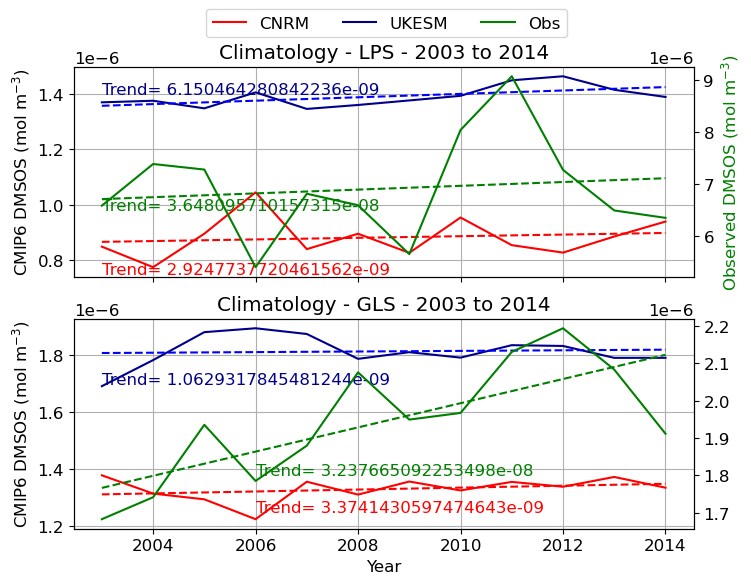

In [226]:
## selecting the years from 2003 to 2014 (matching periods with Obs)
dmsosset_AreaMean_AnnMean_2003to2014_UKESM_LapS = dmsosset_AreaMean_AnnMean_UKESM_LapS.isel(year = 
                                                  slice(153,None))
dmsosset_AreaMean_AnnMean_2003to2014_CNRM_LapS = dmsosset_AreaMean_AnnMean_CNRM_LapS.isel(year = 
                                                  slice(153,None))
dmsosset_AreaMean_AnnMean_2003to2014_UKESM_GLS = dmsosset_AreaMean_AnnMean_UKESM_GLS.isel(year = 
                                                  slice(153,None))
dmsosset_AreaMean_AnnMean_2003to2014_CNRM_GLS = dmsosset_AreaMean_AnnMean_CNRM_GLS.isel(year = 
                                                  slice(153,None))

## estimating the trends
model_CNRM_LPS_fit1 = linreg(dmsosset_AreaMean_AnnMean_2003to2014_CNRM_LapS.year,
                            dmsosset_AreaMean_AnnMean_2003to2014_CNRM_LapS)
slope1 = model_CNRM_LPS_fit1[3]
model_UKESM_LPS_fit2 = linreg(dmsosset_AreaMean_AnnMean_2003to2014_UKESM_LapS.year,
                            dmsosset_AreaMean_AnnMean_2003to2014_UKESM_LapS)
slope2 = model_UKESM_LPS_fit2[3]
model_CNRM_GLS_fit1 = linreg(dmsosset_AreaMean_AnnMean_2003to2014_CNRM_GLS.year,
                            dmsosset_AreaMean_AnnMean_2003to2014_CNRM_GLS)
slope3 = model_CNRM_GLS_fit1[3]
model_UKESM_GLS_fit2 = linreg(dmsosset_AreaMean_AnnMean_2003to2014_UKESM_GLS.year,
                            dmsosset_AreaMean_AnnMean_2003to2014_UKESM_GLS)
slope4 = model_UKESM_GLS_fit2[3]
model_obs_GLS_fit=linreg(dmsosObs_AreaMean_AnnMean_2003to2014_GLS.year,
         dmsosObs_AreaMean_AnnMean_2003to2014_GLS['dms']*1.0e-6)
slope5=model_obs_GLS_fit[3]
model_obs_LPS_fit=linreg(dmsosObs_AreaMean_AnnMean_2003to2014_LapS.year,
         dmsosObs_AreaMean_AnnMean_2003to2014_LapS['dms']*1.0e-6)
slope6=model_obs_LPS_fit[3]
## making the plot
mpl.rcParams.update({'font.size':12})
fig, ax = plt.subplots(2,1,figsize=(8,6))
lns1=ax[0].plot(dmsosset_AreaMean_AnnMean_2003to2014_CNRM_LapS.year,
         dmsosset_AreaMean_AnnMean_2003to2014_CNRM_LapS,label='CNRM',color='red')
ax[0].plot(model_CNRM_LPS_fit1[0],model_CNRM_LPS_fit1[2], '--k', color='red')
ax[0].text(2003,0.75e-6,'Trend= {0}'.format(slope1),color='red')
lns2=ax[0].plot(dmsosset_AreaMean_AnnMean_2003to2014_UKESM_LapS.year,
         dmsosset_AreaMean_AnnMean_2003to2014_UKESM_LapS,label='UKESM',color='darkblue')
ax[0].plot(model_UKESM_LPS_fit2[0],model_UKESM_LPS_fit2[2], '--k', color='blue')
ax[0].text(2003,1.4e-6,'Trend= {0}'.format(slope2),color='darkblue')
ax[0].set_xticklabels([])
ax0 = ax[0].twinx()
lns3=ax0.plot(dmsosObs_AreaMean_AnnMean_2003to2014_LapS.year,
         dmsosObs_AreaMean_AnnMean_2003to2014_LapS['dms']*1.0e-6,label='Obs',
         color='green')
ax0.plot(model_obs_LPS_fit[0],model_obs_LPS_fit[2],'--k', color='green')
ax0.text(2003,6.5e-6,'Trend= {0}'.format(slope6),color='green')
ax0.set_ylabel("Observed DMSOS (mol m$^{-3}$)",color="green",fontsize=12)
# added these three legends in one legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax[0].legend(lns, labs, bbox_to_anchor=(0.2,1.1,1,0.2),loc="lower left",ncol=3)

ax[1].plot(dmsosset_AreaMean_AnnMean_2003to2014_CNRM_GLS.year,
         dmsosset_AreaMean_AnnMean_2003to2014_CNRM_GLS,label='CNRM',color='red')
ax[1].plot(model_CNRM_GLS_fit1[0],model_CNRM_GLS_fit1[2], '--k', color='red')
ax[1].text(2006,1.25e-6,'Trend= {0}'.format(slope3),color='red')
ax[1].plot(dmsosset_AreaMean_AnnMean_2003to2014_UKESM_GLS.year,
         dmsosset_AreaMean_AnnMean_2003to2014_UKESM_GLS,label='UKESM',color='darkblue')
ax[1].plot(model_UKESM_GLS_fit2[0],model_UKESM_GLS_fit2[2], '--k', color='blue')
ax[1].text(2003,1.7e-6,'Trend= {0}'.format(slope4),color='darkblue')
ax1 = ax[1].twinx()
ax1.plot(dmsosObs_AreaMean_AnnMean_2003to2014_GLS.year,
         dmsosObs_AreaMean_AnnMean_2003to2014_GLS['dms']*1.0e-6,label='Obs',
         color='green')
ax1.plot(model_obs_GLS_fit[0],model_obs_GLS_fit[2],'--k', color='green')
ax1.text(2006,1.8e-6,'Trend= {0}'.format(slope5),color='green')

#ax.legend()
ax[1].set_xlabel('Year')
ax[0].set_ylabel('CMIP6 DMSOS (mol m$^{-3}$)')
ax[1].set_ylabel('CMIP6 DMSOS (mol m$^{-3}$)')
ax[0].set_title('Climatology - LPS - 2003 to 2014')
ax[1].set_title('Climatology - GLS - 2003 to 2014')
ax[0].grid()
ax[1].grid()
fig.savefig('Fig6_climatology_variability_trend_of_DMS_SurfConc_2003to2014_LapSeaaArea_CNRMvsUKESMvsObs.png')


In [47]:
# Lap Sea area
# historical
dmsosset_AreaMean_MonMean_UKESM_LapS = dmsosset_AreaMean_UKESM_LapS.groupby(
                                       'time.month').mean().compute()
dmsosset_AreaMean_MonSTD_UKESM_LapS = dmsosset_AreaMean_UKESM_LapS.groupby(
                                       'time.month').std().compute()
dmsosset_AreaMean_MonMean_CNRM_LapS = dmsosset_AreaMean_CNRM_LapS.groupby(
                                       'time.month').mean().compute()
dmsosset_AreaMean_MonSTD_CNRM_LapS = dmsosset_AreaMean_CNRM_LapS.groupby(
                                       'time.month').std().compute()
# 2003 -2014
dmsosset_AreaMean_MonMean_2003to2014_UKESM_LapS = dmsosset_AreaMean_UKESM_LapS.isel(time=slice(
                                                  1836,None)).groupby('time.month').mean().compute()
dmsosset_AreaMean_MonSTD_2003to2014_UKESM_LapS = dmsosset_AreaMean_UKESM_LapS.isel(time=slice(
                                                  1836,None)).groupby('time.month').std().compute()

dmsosset_AreaMean_MonMean_2003to2014_CNRM_LapS = dmsosset_AreaMean_CNRM_LapS.isel(time=slice(
                                                  1836,None)).groupby('time.month').mean().compute()
dmsosset_AreaMean_MonSTD_2003to2014_CNRM_LapS = dmsosset_AreaMean_CNRM_LapS.isel(time=slice(
                                                  1836,None)).groupby('time.month').std().compute()

dmsosObs_AreaMean_MonMean_LapS = dmsosObs_AreaMean_2003to2014_LapS.groupby(
                                       'time.month').mean().compute()
dmsosObs_AreaMean_MonSTD_LapS = dmsosObs_AreaMean_2003to2014_LapS.groupby(
                                       'time.month').std().compute()
# first 30 years
dmsosset_AreaMean_MonMean_1850to1880_UKESM_LapS = dmsosset_AreaMean_UKESM_LapS.isel(time=slice(
                                                  372)).groupby('time.month').mean().compute()
dmsosset_AreaMean_MonSTD_1850to1880_UKESM_LapS = dmsosset_AreaMean_UKESM_LapS.isel(time=slice(
                                                  372)).groupby('time.month').std().compute()

dmsosset_AreaMean_MonMean_1850to1880_CNRM_LapS = dmsosset_AreaMean_CNRM_LapS.isel(time=slice(
                                                  372)).groupby('time.month').mean().compute()
dmsosset_AreaMean_MonSTD_1850to1880_CNRM_LapS = dmsosset_AreaMean_CNRM_LapS.isel(time=slice(
                                                  372)).groupby('time.month').std().compute()
# last 30 years
dmsosset_AreaMean_MonMean_1984to2014_UKESM_LapS = dmsosset_AreaMean_UKESM_LapS.isel(time=slice(
                                                  1608,None)).groupby('time.month').mean().compute()
dmsosset_AreaMean_MonSTD_1984to2014_UKESM_LapS = dmsosset_AreaMean_UKESM_LapS.isel(time=slice(
                                                  1608,None)).groupby('time.month').std().compute()

dmsosset_AreaMean_MonMean_1984to2014_CNRM_LapS = dmsosset_AreaMean_CNRM_LapS.isel(time=slice(
                                                  1608,None)).groupby('time.month').mean().compute()
dmsosset_AreaMean_MonSTD_1984to2014_CNRM_LapS = dmsosset_AreaMean_CNRM_LapS.isel(time=slice(
                                                  1608,None)).groupby('time.month').std().compute()


/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


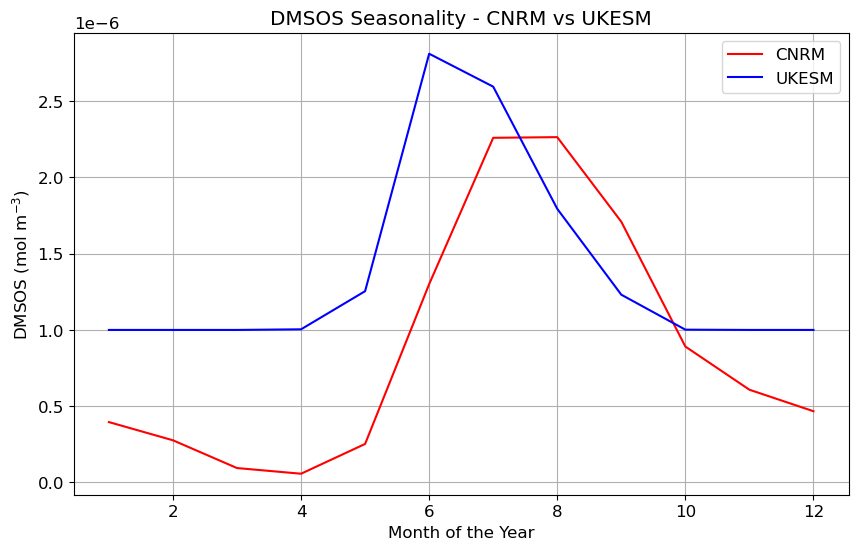

In [48]:
mpl.rcParams.update({'font.size':12})
fig, ax = plt.subplots(1,figsize=(10,6))
plt.plot(dmsosset_AreaMean_MonMean_2003to2014_CNRM_LapS.month,
         dmsosset_AreaMean_MonMean_2003to2014_CNRM_LapS,label='CNRM',color='red')
plt.plot(dmsosset_AreaMean_MonMean_2003to2014_UKESM_LapS.month,
         dmsosset_AreaMean_MonMean_2003to2014_UKESM_LapS,label='UKESM', color='blue')
plt.legend()
plt.xlabel('Month of the Year')
plt.ylabel('DMSOS (mol m$^{-3}$)')
plt.title('DMSOS Seasonality - CNRM vs UKESM')
plt.savefig('Fig7_Seasonality_of_DMS_SurfConc_Historical_LapSeaaArea_CNRM_vs_UKESM.png')
plt.grid()

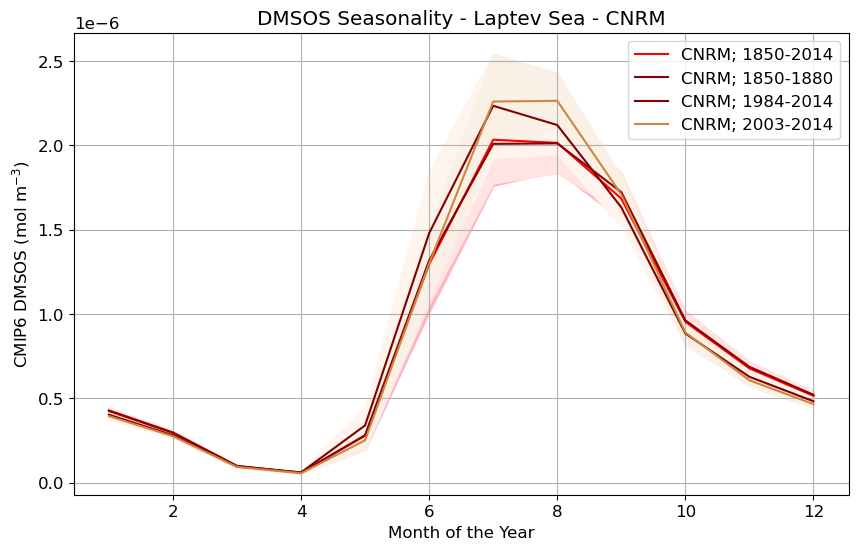

In [49]:
mpl.rcParams.update({'font.size':12})
fig, ax = plt.subplots(1,figsize=(10,6))
ax.plot(dmsosset_AreaMean_MonMean_CNRM_LapS.month,
         dmsosset_AreaMean_MonMean_CNRM_LapS,label='CNRM; 1850-2014',color='red')
plt.fill_between(dmsosset_AreaMean_MonMean_CNRM_LapS.month,dmsosset_AreaMean_MonMean_CNRM_LapS
                 -0.5*dmsosset_AreaMean_MonSTD_CNRM_LapS,dmsosset_AreaMean_MonMean_CNRM_LapS
                 +0.5*dmsosset_AreaMean_MonSTD_CNRM_LapS,color='lightpink')
ax.plot(dmsosset_AreaMean_MonMean_1850to1880_CNRM_LapS.month,
         dmsosset_AreaMean_MonMean_1850to1880_CNRM_LapS,label='CNRM; 1850-1880',color='darkred')
plt.fill_between(dmsosset_AreaMean_MonMean_1850to1880_CNRM_LapS.month,
                 dmsosset_AreaMean_MonMean_1850to1880_CNRM_LapS
                 -0.5*dmsosset_AreaMean_MonSTD_1850to1880_CNRM_LapS,
                 dmsosset_AreaMean_MonMean_1850to1880_CNRM_LapS
                 +0.5*dmsosset_AreaMean_MonSTD_1850to1880_CNRM_LapS,color='mistyrose')
ax.plot(dmsosset_AreaMean_MonMean_1984to2014_CNRM_LapS.month,
         dmsosset_AreaMean_MonMean_1984to2014_CNRM_LapS,label='CNRM; 1984-2014',color='maroon')
plt.fill_between(dmsosset_AreaMean_MonMean_1984to2014_CNRM_LapS.month,
                 dmsosset_AreaMean_MonMean_1984to2014_CNRM_LapS
                 -0.5*dmsosset_AreaMean_MonSTD_1984to2014_CNRM_LapS,
                 dmsosset_AreaMean_MonMean_1984to2014_CNRM_LapS
                 +0.5*dmsosset_AreaMean_MonSTD_1984to2014_CNRM_LapS,color='seashell')
ax.plot(dmsosset_AreaMean_MonMean_2003to2014_CNRM_LapS.month,
         dmsosset_AreaMean_MonMean_2003to2014_CNRM_LapS,label='CNRM; 2003-2014',color='peru')
plt.fill_between(dmsosset_AreaMean_MonMean_2003to2014_CNRM_LapS.month,
                 dmsosset_AreaMean_MonMean_2003to2014_CNRM_LapS
                 -0.5*dmsosset_AreaMean_MonSTD_2003to2014_CNRM_LapS,
                 dmsosset_AreaMean_MonMean_2003to2014_CNRM_LapS
                 +0.5*dmsosset_AreaMean_MonSTD_2003to2014_CNRM_LapS,color='linen')

#ax2.set_ylabel("Observed DMSOS (mol m$^{-3}$)",color="green",fontsize=12)
#fig.legend(loc=loc)#'center')
ax.legend()
ax.set_xlabel('Month of the Year')
ax.set_ylabel('CMIP6 DMSOS (mol m$^{-3}$)')
ax.set_title('DMSOS Seasonality - Laptev Sea - CNRM')
fig.savefig('Fig7a_Seasonality_of_DMS_SurfConc_LapSeaaArea_CNRM.png')
ax.grid()

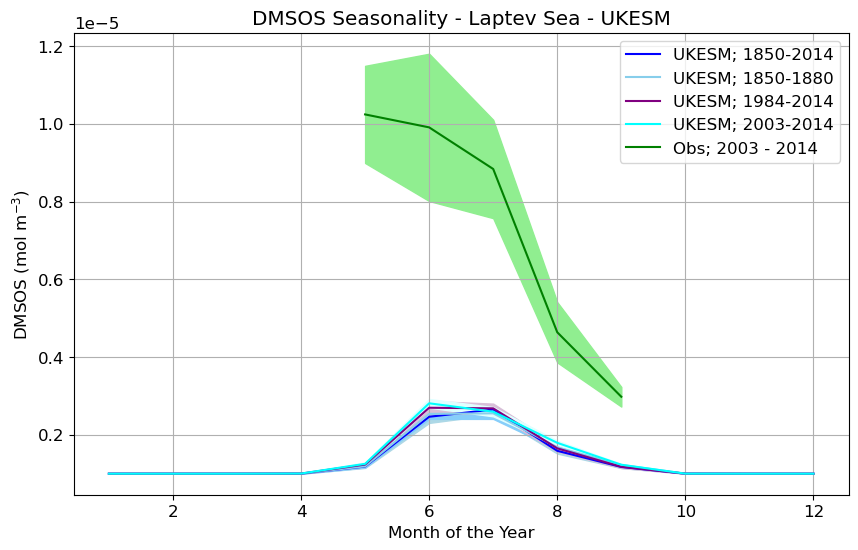

In [50]:
mpl.rcParams.update({'font.size':12})
fig, ax = plt.subplots(1,figsize=(10,6))
ax.plot(dmsosset_AreaMean_MonMean_UKESM_LapS.month,
         dmsosset_AreaMean_MonMean_UKESM_LapS,label='UKESM; 1850-2014',color='blue')
plt.fill_between(dmsosset_AreaMean_MonMean_UKESM_LapS.month,dmsosset_AreaMean_MonMean_UKESM_LapS
                 -0.5*dmsosset_AreaMean_MonSTD_UKESM_LapS,dmsosset_AreaMean_MonMean_UKESM_LapS
                 +0.5*dmsosset_AreaMean_MonSTD_UKESM_LapS,color='lightblue')
ax.plot(dmsosset_AreaMean_MonMean_1850to1880_UKESM_LapS.month,
         dmsosset_AreaMean_MonMean_1850to1880_UKESM_LapS,label='UKESM; 1850-1880',color='skyblue')
plt.fill_between(dmsosset_AreaMean_MonMean_1850to1880_UKESM_LapS.month,
                 dmsosset_AreaMean_MonMean_1850to1880_UKESM_LapS
                 -0.5*dmsosset_AreaMean_MonSTD_1850to1880_UKESM_LapS,
                 dmsosset_AreaMean_MonMean_1850to1880_UKESM_LapS
                 +0.5*dmsosset_AreaMean_MonSTD_1850to1880_UKESM_LapS,color='lightskyblue')
ax.plot(dmsosset_AreaMean_MonMean_1984to2014_UKESM_LapS.month,
         dmsosset_AreaMean_MonMean_1984to2014_UKESM_LapS,label='UKESM; 1984-2014',color='purple')
plt.fill_between(dmsosset_AreaMean_MonMean_1984to2014_UKESM_LapS.month,
                 dmsosset_AreaMean_MonMean_1984to2014_UKESM_LapS
                 -0.5*dmsosset_AreaMean_MonSTD_1984to2014_UKESM_LapS,
                 dmsosset_AreaMean_MonMean_1984to2014_UKESM_LapS
                 +0.5*dmsosset_AreaMean_MonSTD_1984to2014_UKESM_LapS,color='thistle')
ax.plot(dmsosset_AreaMean_MonMean_2003to2014_UKESM_LapS.month,
         dmsosset_AreaMean_MonMean_2003to2014_UKESM_LapS,label='UKESM; 2003-2014',color='cyan')
plt.fill_between(dmsosset_AreaMean_MonMean_2003to2014_UKESM_LapS.month,
                 dmsosset_AreaMean_MonMean_2003to2014_UKESM_LapS
                 -0.5*dmsosset_AreaMean_MonSTD_2003to2014_UKESM_LapS,
                 dmsosset_AreaMean_MonMean_2003to2014_UKESM_LapS
                 +0.5*dmsosset_AreaMean_MonSTD_2003to2014_UKESM_LapS,color='lightcyan')
ax.plot(dmsosObs_AreaMean_MonMean_LapS.month,
         dmsosObs_AreaMean_MonMean_LapS['dms']*1.0e-6,label='Obs; 2003 - 2014',
         color='green')
plt.fill_between(dmsosObs_AreaMean_MonMean_LapS.month,
                 (dmsosObs_AreaMean_MonMean_LapS['dms']*1.0e-6)-0.5*
                 (dmsosObs_AreaMean_MonSTD_LapS['dms']*1.0e-6),
                 (dmsosObs_AreaMean_MonMean_LapS['dms']*1.0e-6)+0.5*
                 (dmsosObs_AreaMean_MonSTD_LapS['dms']*1.0e-6),
                 color='lightgreen')

#ax2.set_ylabel("Observed DMSOS (mol m$^{-3}$)",color="green",fontsize=12)
#fig.legend(loc=loc)#'center')
ax.legend()
ax.set_xlabel('Month of the Year')
ax.set_ylabel('DMSOS (mol m$^{-3}$)')
ax.set_title('DMSOS Seasonality - Laptev Sea - UKESM')
fig.savefig('Fig7c_Seasonality_of_DMS_SurfConc_LapSeaaArea_UKESMVsObs.png')
ax.grid()

### Correlation between CMIP6 and Obs
Checking out the correlation between CMIP6 and observations require calculating the spatial mean of DMSOS over each of the studied domains (LPS and GLS) for the period between 2003 to 2014 for both models as well as the for the observation. 

In [51]:
# CMIP6 over LapSea
dmsosset_AreaMean_2003to2014_UKESM_LapS = dmsosset_AreaMean_UKESM_LapS.isel(time=slice(
                                                  1836,None))
dmsosset_AreaMean_2003to2014_CNRM_LapS = dmsosset_AreaMean_CNRM_LapS.isel(time=slice(
                                                  1836,None))
# CMIP6 over GLS
dmsosset_AreaMean_2003to2014_UKESM_GLS = dmsosset_AreaMean_UKESM_GLS.isel(time=slice(
                                                  1836,None))
dmsosset_AreaMean_2003to2014_CNRM_GLS = dmsosset_AreaMean_CNRM_GLS.isel(time=slice(
                                                  1836,None))

In [52]:
dmsObs_mthlymean_LapS = dmsosObs_AreaMean_2003to2014_LapS.resample(time='d').nearest().resample(time='m').mean()


/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


/tmp/ipykernel_1985/1641351117.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(model_CNRM_LPS_fit[0],model_CNRM_LPS_fit[2], '--k', color='red')
/tmp/ipykernel_1985/1641351117.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  plt.plot(model_UKESM_LPS_fit[0],model_UKESM_LPS_fit[2], '--k', color='blue')


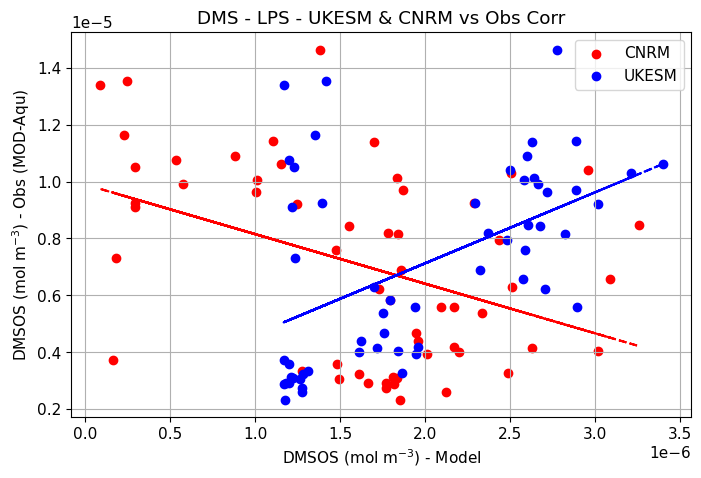

In [54]:
model_CNRM_LPS_fit = linreg(dmsosset_AreaMean_2003to2014_CNRM_LapS,
                                              dmsObs_mthlymean_LapS['dms']*1e-6)
model_UKESM_LPS_fit = linreg(dmsosset_AreaMean_2003to2014_UKESM_LapS,
                                              dmsObs_mthlymean_LapS['dms']*1e-6)
mpl.rcParams.update({'font.size':11})
fig, ax = plt.subplots(1,figsize=(8,5))

plt.scatter(dmsosset_AreaMean_2003to2014_CNRM_LapS,dmsObs_mthlymean_LapS['dms']*1e-6,
            color='red', label='CNRM')
plt.scatter(dmsosset_AreaMean_2003to2014_UKESM_LapS,dmsObs_mthlymean_LapS['dms']*1e-6,
            color='blue', label='UKESM')
plt.plot(model_CNRM_LPS_fit[0],model_CNRM_LPS_fit[2], '--k', color='red')
plt.plot(model_UKESM_LPS_fit[0],model_UKESM_LPS_fit[2], '--k', color='blue')

#plt.plot([0,3.5e-6], [0,12e-6], 'k', color='blue')
#plt.plot([0,3.5e-6], [0,10e-6], 'k', color='red')
plt.xlabel('DMSOS (mol m$^{-3}$) - Model')
plt.ylabel('DMSOS (mol m$^{-3}$) - Obs (MOD-Aqu)')
plt.title('DMS - LPS - UKESM & CNRM vs Obs Corr')
plt.legend()
plt.grid()
plt.savefig('fig10b_DMS_SurfConc_correlation_LPS_UKESM_vs_ObsModisAqua.png')

## Comparing with sea ice extent, for later

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


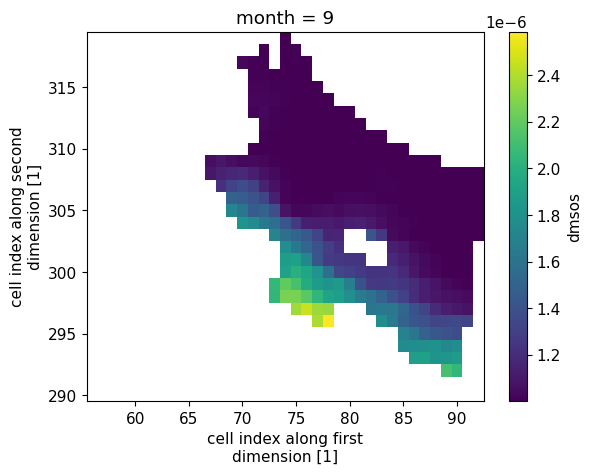

In [55]:
dms_Month_Mean2003to2014_UKESM_LPS = dmsosset_LapSarea_UKESM.isel(time = slice(1836,
                                                        None)).groupby('time.month').mean(dim='time',
                                                              keep_attrs=True).compute() 

dms_Month_Mean2003to2014_UKESM_LPS[8].plot()


/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


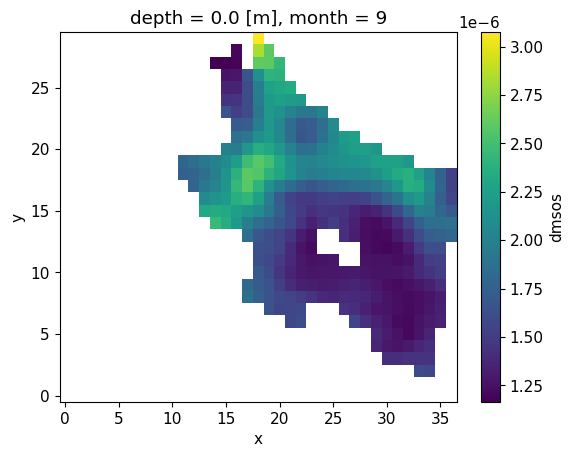

In [56]:
dms_Month_Mean2003to2014_CNRM_LPS = dmsosset_LapSarea_CNRM.isel(time = slice(1836,
                                                        None)).groupby('time.month').mean(dim='time',
                                                              keep_attrs=True).compute() 

dms_Month_Mean2003to2014_CNRM_LPS[8].plot()

In [57]:
dmsObs_Month_Mean2003to2014_LPS = DmsObs_LapSarea.isel(time= slice(552)
                                                        ).groupby('time.month').mean(dim='time',
                                                         keep_attrs=True).compute() 
dmsObs_Month_Mean2003to2014_LPS

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


<xarray.Dataset>
Dimensions:      (pixel: 2485, month: 12)
Coordinates:
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: pixel
Data variables:
    longitude    (pixel, month) float64 100.3 100.3 100.3 ... 159.4 159.4 159.4
    latitude     (pixel, month) float64 70.12 70.12 70.12 ... 79.88 79.88 79.88
    startjulday  (month, pixel) float64 13.0 13.0 13.0 ... 349.0 349.0 349.0
    endjulday    (month, pixel) float64 20.0 20.0 20.0 ... 355.2 355.2 355.2
    dms          (pixel, month) float64 nan nan nan nan nan ... nan nan nan nan

/tmp/ipykernel_1985/3160535552.py:65: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


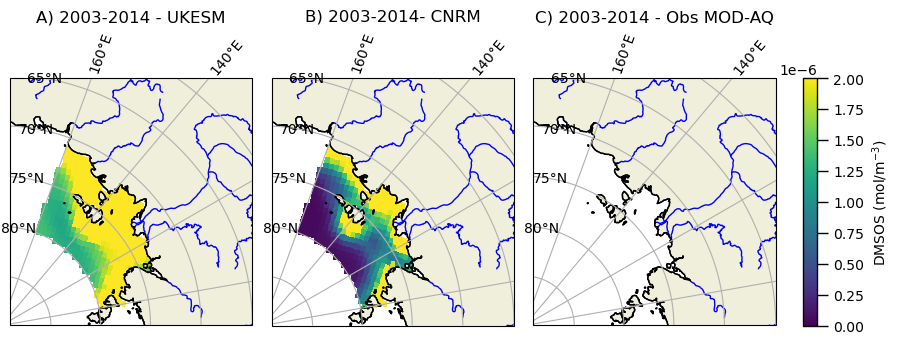

In [58]:
mpl.rcParams.update({'font.size':10})
fig, ax = plt.subplots(1,3,figsize=(8,8),subplot_kw={'projection':ccrs.NorthPolarStereo()})
ax[0].set_extent([90,170,65,85], ccrs.PlateCarree())
ax[1].set_extent([90,170,65,85], ccrs.PlateCarree())
ax[2].set_extent([90,170,65,85], ccrs.PlateCarree())
pl_UKESM=ax[0].pcolormesh(dms_Month_Mean2003to2014_UKESM_LPS.longitude,
                       dms_Month_Mean2003to2014_UKESM_LPS.latitude,
              dms_Month_Mean2003to2014_UKESM_LPS[5], 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[0].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[0].set_title('A) 2003-2014 - UKESM')
ax[0].gridlines(draw_labels=True)
ax[0].coastlines()
ax[0].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')
pl_CNRM=ax[1].pcolormesh(dms_Month_Mean2003to2014_CNRM_LPS.lon,
                         dms_Month_Mean2003to2014_CNRM_LPS.lat,
                         dms_Month_Mean2003to2014_CNRM_LPS[5], 
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[1].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[1].set_title('B) 2003-2014- CNRM')
ax[1].gridlines(draw_labels=True)
ax[1].coastlines()
ax[1].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')

pl_Obs=ax[2].pcolormesh(dmsObs_Month_Mean2003to2014_LPS.longitude,
                        dmsObs_Month_Mean2003to2014_LPS.latitude,
                        dmsObs_Month_Mean2003to2014_LPS.dms*1.0e-6,
    vmin=0,vmax=2.0e-6,          
    transform=ccrs.PlateCarree(),
    # transform=ccrs.AlbersEqualArea(),
    # levels=10,
        )
ax[2].add_feature(cartopy.feature.LAND, zorder=1, edgecolor='black')
ax[2].set_title('C) 2003-2014 - Obs MOD-AQ')
ax[2].gridlines(draw_labels=True)
ax[2].coastlines()
ax[2].add_feature(cartopy.feature.RIVERS, zorder=1, edgecolor='blue')
#fig.colorbar(pl_CMIP6,shrink=0.4)
############# COLORBAR properties ##############
# create the ax based on an ax dimensions
axins = inset_axes(ax[2],
                    width="6%",  
                    height="100%",
                    loc='right',
                    borderpad=-3
                   )

# add colorbar from ax
cbar = fig.colorbar(pl_UKESM, cax=axins, orientation='vertical')
cbar = fig.colorbar(pl_CNRM, cax=axins, orientation='vertical')
cbar = fig.colorbar(pl_Obs, cax=axins, orientation='vertical')
# style(axins)
cbar.set_label('DMSOS (mol/m$^{-3}$)')

# thickness of spines around the colorbar
cbar.outline.set_linewidth(1)
fig.tight_layout()
def style_cbar(ax):
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='both', which='both', length=8, width=1, direction='out')

style_cbar(axins)

NameError: name 'dms_AnnMeanAllHistrorical_CNRM_LapS' is not defined

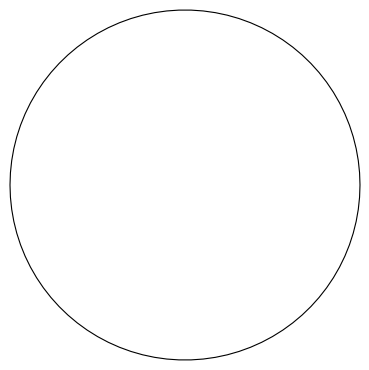

In [59]:
# Create figure 4
#import Functions as f

extent = [100,160, 80, 70]
fig = plt.figure(1, figsize=[10,10])
ax = plt.subplot(2, 2, 1, projection=ccrs.NorthPolarStereo())
#f.mapfeatures(ax,extent)
ax = dms_AnnMeanAllHistrorical_CNRM_LapS.plot.pcolormesh(x='lon', y='lat', 
    cmap='PiYG_r', vmax = 2.0e-6, vmin = 0,
    transform = ccrs.PlateCarree(), 
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8})
plt.title('A: 1850-2014 CNRM')

ax = plt.subplot(2, 2, 2, projection=ccrs.NorthPolarStereo() )
#f.mapfeatures(ax,extent)
ax = dms_AnnMeanAllHistrorical_UKESM_LapS.plot.pcolormesh(x='longitude', y='latitude', 
    cmap='PiYG_r', vmax = 2.0e-6, vmin = 0,
    transform = ccrs.PlateCarree(), 
    cbar_kwargs={ 'orientation':'vertical', 'shrink':.8})
plt.title('B: 1850-2014 UKESM')

In [ ]:
dms_Mean2003to2014_GLS_CNRM2 = dmsosset_GLarea_CNRM.isel(time = slice(1836,
                                                        None))
dms_Mean2003to2014_GLS_CNRM2

In [ ]:
dms_Mean2003to2014_LapS_CNRM